# CAPT Network

### Kura and Eda

Putting together the locator net and single char classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import image_preprocess
import os
from CAPT_net import CAPT_NET

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

2023-04-20 18:14:06.010601: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 18:14:06.095460: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-20 18:14:06.095475: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-20 18:14:06.837288: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

## Data Import

In [2]:
#loc_training data
#Make sure at least one of these files exist
#Path to full data files created by Data Gen Notebook
X_PATH = "data/x_single.npy"
Y_PATH = "data/y_single_pos.npy"

#Preprocessed and saved previously
X_PREPROCESSED = "data/x_single_preprocessed.npy"
Y_PREPROCESSED = "data/y_single_pos_preprocessed.npy"


if not os.path.exists(X_PREPROCESSED):
    print("Preprocessing data, please wait...")
    image_preprocess.preprocess_image_data(X_PATH, Y_PATH)
    print("Preprocessed data saved to disk")

print("Loading in preprocessed data")
print("Creating Splits")
loc_x_train, loc_x_val, loc_x_test, loc_x_train_dev, loc_x_val_dev,  loc_y_train, loc_y_val, loc_y_test, loc_y_train_dev, loc_y_val_dev =  image_preprocess.split(X_PREPROCESSED, Y_PREPROCESSED)


Loading in preprocessed data
Creating Splits


In [3]:
#Make sure at least one of these files exist
#Path to full data files created by Data Gen Notebook
X_PATH = "data/x_single_centered.npy"
Y_PATH = "data/y_single_label_centered.npy"

#Preprocessed and saved previously
X_PREPROCESSED = "data/x_single_centered_preprocessed.npy"
Y_PREPROCESSED = "data/y_single_label_centered_preprocessed.npy"

X_UNCENTERED = "data/x_single.npy"
Y_LOC = "data/y_single_pos.npy"
Y_UNCENTERED = 'data/y_single_label.npy'


if not os.path.exists(X_PATH) or not os.path.exists(Y_PATH):
    #Extracting all centered single char images
    #Creating
    print("Getting all single centered images from dataset")
    y_pos = np.load(Y_LOC)
    y_label = np.load(Y_UNCENTERED)
    x = np.load(X_UNCENTERED)
    centered_labels = y_label[np.nonzero(y_pos)]
    centered_x = x[np.nonzero(y_pos)]

    np.save("data/x_single_centered.npy", centered_x)
    np.save("data/y_single_label_centered.npy", centered_labels)
    print("Cenetered images and labels saved to disk")
    print(f"Centered X samples: {centered_x.shape}")
    #Freeing up memory
    del y_pos
    del y_label
    del centered_labels
    del centered_x


if not os.path.exists(X_PREPROCESSED) and not os.path.exists(Y_PREPROCESSED):
    print("Preprocessing data, please wait...")
    x, y = image_preprocess.preprocess_image_data(X_PATH, Y_PATH)
    print(x.shape)
    print(y.shape)
    print("Preprocessed data saved to disk")
    

print("Loading in preprocessed data")
print("Creating Splits")
class_x_train, class_x_val, class_x_test, class_x_train_dev, class_x_val_dev,  class_y_train, class_y_val, class_y_test, class_y_train_dev, class_y_val_dev =  image_preprocess.split(X_PREPROCESSED, Y_PREPROCESSED, test_split=100)



Loading in preprocessed data
Creating Splits


## Training Networks


In [4]:
#Building Networks
CAPT_net = CAPT_NET(
                K = 5,
                M = 28,
                verbose = True,
                loc_lr = 0.0015,
                class_lr = 0.001)



2023-04-20 18:14:08.517649: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-20 18:14:08.517666: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-20 18:14:08.517705: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (MrKrabs): /proc/driver/nvidia/version does not exist
2023-04-20 18:14:08.517933: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
188/188 [==============================] - 3s 13ms/step - loss: 0.3507 - accuracy: 0.8433 - val_loss: 0.2007 - val_accuracy: 0.9244
Epoch 2/5
188/188 [==============================] - 2s 12ms/step - loss: 0.1795 - accuracy: 0.9287 - val_loss: 0.1397 - val_accuracy: 0.9470
Epoch 3/5
188/188 [==============================] - 2s 12ms/step - loss: 0.1416 - accuracy: 0.9441 - val_loss: 0.1183 - val_accuracy: 0.9643
Epoch 4/5
188/188 [==============================] - 2s 12ms/step - loss: 0.1189 - accuracy: 0.9529 - val_loss: 0.1006 - val_accuracy: 0.9655
Epoch 5/5
188/188 [==============================] - 2s 12ms/step - loss: 0.1041 - accuracy: 0.9599 - val_loss: 0.1166 - val_accuracy: 0.9536
------------------------
Successfully Trained loc net


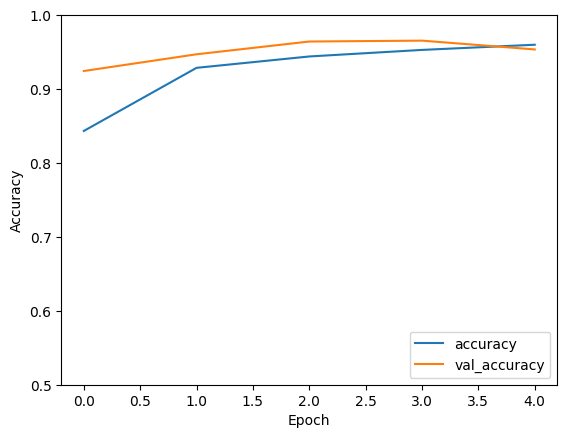

In [5]:
#Training loc net
history = CAPT_net.train_loc(loc_x_train,loc_y_train, loc_x_val, loc_y_val, 
                  loc_mini_batch=100, loc_epochs=5)

print("------------------------")
print("Successfully Trained loc net")

#Plotting Training Data
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


Epoch 1/12
94/94 [==============================] - 11s 118ms/step - loss: 3.1843 - accuracy: 0.1272 - val_loss: 2.2846 - val_accuracy: 0.3714
Epoch 2/12
94/94 [==============================] - 11s 115ms/step - loss: 1.7947 - accuracy: 0.4754 - val_loss: 1.4616 - val_accuracy: 0.5562
Epoch 3/12
94/94 [==============================] - 11s 116ms/step - loss: 1.2053 - accuracy: 0.6417 - val_loss: 1.1493 - val_accuracy: 0.6420
Epoch 4/12
94/94 [==============================] - 11s 115ms/step - loss: 0.9452 - accuracy: 0.7139 - val_loss: 1.0268 - val_accuracy: 0.6835
Epoch 5/12
94/94 [==============================] - 11s 114ms/step - loss: 0.7911 - accuracy: 0.7612 - val_loss: 0.8177 - val_accuracy: 0.7504
Epoch 6/12
94/94 [==============================] - 11s 114ms/step - loss: 0.6588 - accuracy: 0.8002 - val_loss: 0.7374 - val_accuracy: 0.7629
Epoch 7/12
94/94 [==============================] - 11s 115ms/step - loss: 0.5589 - accuracy: 0.8272 - val_loss: 0.6917 - val_accuracy: 0.7857

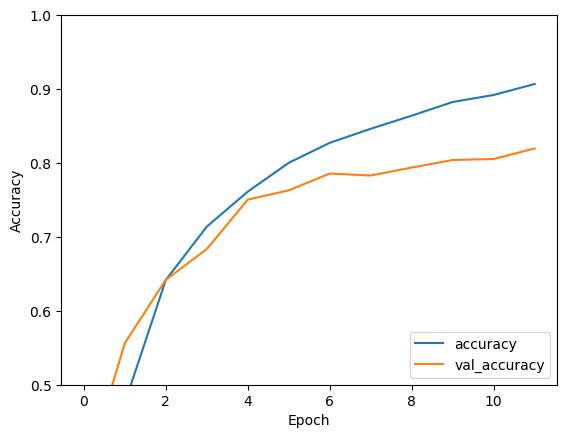

In [6]:
#Training Classifier
history = CAPT_net.train_class(class_x_train,class_y_train, class_x_val, class_y_val, 
                  mini_batch=100, epochs=5)

print("------------------------")
print("Successfully Trained classifer net")

#Plotting Training Data
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

## Multi Char Data

In [7]:
if not os.path.exists("data/x_multi_preprocessed.npy") and not os.path.exists("data/y_multi_preprocessed.npy"):
    print("Preprocessing data...")
    image_preprocess.preprocess_image_data("data/x_multi.npy", "data/y_multi.npy")
    print("Preprocessed data saved to disk")

x_multi = np.load("data/x_multi_preprocessed.npy")
y_multi = np.load("data/y_multi_preprocessed.npy")

print(f"Loaded in images, x.shape = {x_multi.shape}")

Loaded in images, x.shape = (11700, 72, 200, 1)


img_x=72, img_y=200
ker_x=32, ker_y=32
Begening locator on 6720 pixels


Scanning Image...: 100%|██████████████████████████████████████| 40/40 [00:02<00:00, 17.47it/s]

(32, 32, 1)
1/1 [==============================] - 0s 18ms/step


(32, 32, 1)
1/1 [==============================] - 0s 21ms/step
(32, 32, 1)
1/1 [==============================] - 0s 20ms/step
(32, 32, 1)
1/1 [==============================] - 0s 21ms/step
(32, 32, 1)
1/1 [==============================] - 0s 23ms/step
True Label:      x4rxJ
Predicted Label: irfJi


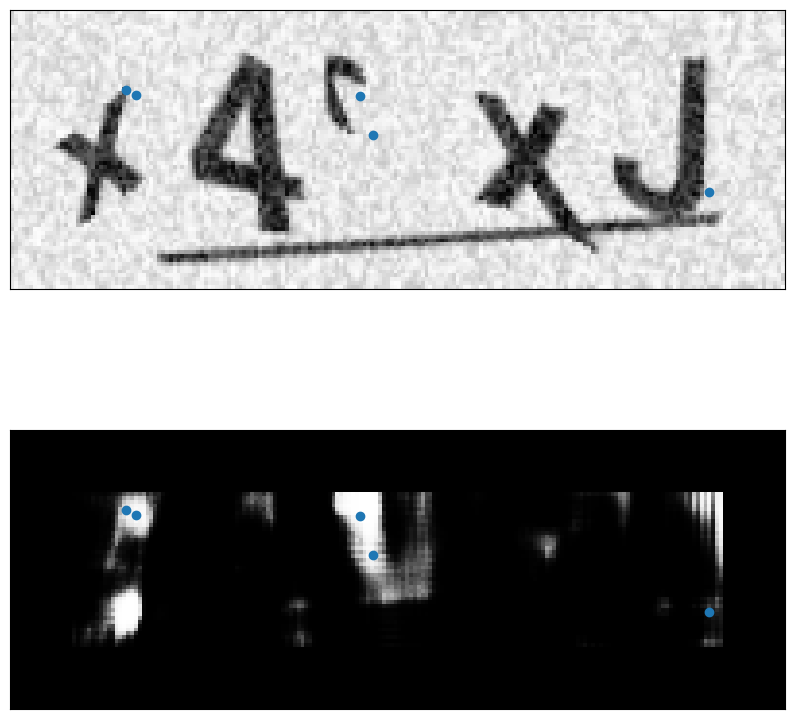

In [9]:
#Test on random image
idx = np.random.randint(x_multi.shape[0])
x = x_multi[idx, :, :, :]
y = y_multi[idx]

pred, heat_map, centriods = CAPT_net.predict(x)


fig, axs = plt.subplots(2,1)
fig.set_size_inches(10,10)

data = [x, heat_map]

for i, ax in enumerate(axs):
    ax.imshow(data[i], cmap="Greys_r")
    ax.set_xticks([])
    ax.set_yticks([])

    ax.scatter(centriods[:,1], centriods[:,0])

print(f"True Label:      {y}")
print(f"Predicted Label: {pred}")